## 다중회귀(Multiple Regression)-2개 이상의 특성으로 학습하는 algorithm

## 1. 다중 회귀 & 특성공학
더 많은 특성을 기반으로 모델을 만들면, 더 정확하게 예측 할 수 있는 모델을 만들 수 있다. 

1개의 특성을 사용하면 선형회귀모델이 직선을 학습하고 2개의 특성을 사용하면 선형회귀는 평면을 학습한다. 그 이상은 3차원이상이 되어 그리거나 상상 하기 힘들어진다. 특성이 많은 고차원에서는 선형회귀가 매우 복잡한 모델을 표현할 수 있다.

여러개의 특성을 사용한 선형 회귀를 다중회귀(multiple regression)이라 부른다.

***여기서 잠깐**

**About regression analysis:**
regression analysis는 크게 2가지로 나누어진다:

 1. **Linear regression** 
     - simple linear regression : 1개의 특성을 사용해서 가장 심플한 직선모양으로 모델링하는 방식
     - multiple regression : 2개 이상의 feature(특성)으로 곡선으로 또는 그 이상의 dimension으로 모델링하는 방식으로 수치를 예측하는 방식
 
 
 2. **Logistic regression** (binary 또는 두개 이상의 events의 확률을 계산해서 분류하는 방식)
 
참고 link : https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/


### 특성공학(feature engineering)

이번 실습에서는 선형회귀의 특성 개수를 늘려서 농어의 길이뿐 아니라 높이와 두깨도 데이터로 사용한다.
  
농어의 길이, 높이, 두께, 3개의 특성을 각각 제곱하고, 서로 곱해서 또 다른 특성을 만들어 여러개의 특성을 활용한다.  

기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 특성공학(feature engineerng)이라 한다.

### 데이터 준비
판다스의 read.csv()함수로 데이터프레임을 만든 다음 to_numpy()로 넘파일
  배열로 바꾼다.

In [3]:
import pandas as pd

df = pd.read_csv('data/perch_full.csv')

#input data:
perch_full = df.to_numpy()
print(perch_full.shape) #3 columns: 길이, 높이, 두께 dataframe --> 3개의 특성 데이터를 가진, 3차원 배열

(56, 3)


In [4]:
import numpy as np

#target_data:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
    )

#### train_test_split

각각의 perch_full(input data)과 perch_weight(target_data)를 훈련세트(train_)와 테스트세트(test_)로 나눈다.

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

### scikit-learn의 PolynomialFeatures 클래스 

scikit learn은 특성을 만들거나 전처리하기 위한 변환기(transformer)를 제공한다.
    
scikit learn의 model 클래스에 일관된 fit(), score(), predict() 메소드가 있는 것처럼,
변환기 클래스에도 fit(), transform() 메서드가 있다. 

fit과 transform을 데이터에 적용해서 특성 공학을 구현한다.

#### PolynomialFeatures 클래스의 활용 간단한 예시:

- 2,3으로 이루어진 샘플 배열을 변환기에 적용한다.
- 변환 객체(poly)를 생성후 fit() transform()메서드를 차례대로 호출해서 sample 배열에 적용한다.
- *주의: fit()메소드에 입력데이터만 입력하고 타깃데이터는 입력하지 않는다.

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
sample = [[2,3]]

poly.fit(sample)
print(poly.transform(sample))

[[1. 2. 3. 4. 6. 9.]]


- 2, 3 각특성을 제곱한 4, 9과 2, 3을 서로 곱한 6이 추가된다.

- 아래와 같이 선형 방정식에서 특성에 곱해지는 coeffcient는 a,b,c이고 절편은 d이다. 절편은 항상 값이 1인 특성과 곱해지는 계수라고 한다.

 [ 무게 = a  x 길이 + b x 높이 + c x 두께 + d x 1 ]


- 여기에서 특성은(길이, 높이, 두께, 1) 이지만 1은 만들 필요가 없어서 include_bias=False로 지정하여 다시 변환한다.
   
(사이킷런은 자동으로 특성에 추가된 절편항은 무시하지만 혼돈을 피하기 위해서 명시적으로 지정한다)

In [7]:
poly = PolynomialFeatures(include_bias = False) 
poly.fit(sample)
print(poly.transform(sample)) #include_bias=False로 transform된 데이터에서 1 은 제외 된다.

[[2. 3. 4. 6. 9.]]


train_input에 변환기를 적용하여 변환된 데이터를 train_poly 저장한다

In [8]:
poly = PolynomialFeatures(include_bias = False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape) #변환된 크기 확인: (42, 3)-->(42, 9) : 특성이 6개가 추가됨

(42, 9)


In [9]:
#테스트 세트도 변환한다.
test_poly = poly.transform(test_input)
print(test_poly.shape)

(14, 9)


#### get_feature_names()
get_feature_names()는 9개 특성이 각각 어떤 입력의 조합으로 만들어졌는지
  알려준다.

In [10]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

### 다중 회귀모델 훈련하기

선형 회귀 모델을 훈련하는 것과 같이 LinearRegression() 클래스 객체를 생성해서 

변환된 데이터로 모델을 훈련하고

결과(얼마나 정확하게 예측하는지) score를 확인해본다.

In [11]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
#변환한 훈련데이터세트로 훈련진행
linreg.fit(train_poly, train_target)
#정확도 확인
print(linreg.score(train_poly, train_target))

0.9903183436982125


농어의 길이뿐만 아니라 높이와 두께를 모두 사용했고 다항 특성을 더 추가했더니 점수가 높아졌다. 특성이 늘어나면 선형 회귀의 능력은 매우 강해지는 것을 알 수 있다.

In [12]:
print(linreg.score(test_poly, test_target))

0.9714559911594155


==> 테스트 세트에 대한 점수는 높아지지 않았지만 농어의 길이만 사용했을 때 있던 
  과소적합 문제는 더 이상 나타나지 않았다.

## 2. 규제

특성의 갯수를 계속 더 많이 추가하면 더 정확한 모델을 확보할 수 있을까?

PolynomialFeatures 클래스의 degree 매개변수를 사용하여 원하는 고차원의 degree를 지정할 수 있다.

5제곱까지 특성을 만들어 보겠다.(과대적합을 유도하기위해 과하게)

In [13]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape, test_poly.shape) # 특성이55개로 엄청 많아짐!!

(42, 55) (14, 55)


In [14]:
linreg.fit(train_poly, train_target)
print(linreg.score(train_poly, train_target)) 
#많아진 특성으로 훈련세트 정확도 결과는 거의 완벽에 가깝다

0.9999999999938143


In [15]:
#반면, 테스트 세트의 정화도는 MINUS값이다!
print(linreg.score(test_poly, test_target))

-144.40744532797535


훈련세트로 확인한 정확도 = 0.9999... >>> 테스트세트로 확인한 정확도 = -144

- 특성의 개수를 크게 늘리면 선형모델은 아주 강해져서 훈련 세트에 대해
  거의 완벽하게 학습하여 과대적합이 되어버린다.

**규제(regularization)**를 통해 과대적합을 줄일 수 있다.

- 규제(regularization)는 머신러닝 모델의 훈련 세트를 너무 과도하게 학습
  하지 못하도록 훼방하는 것을 말한다.
- 선형회귀 모델의 경우 특성에 곱해지는 coefficient(기울기)의 크기를 작게 만드는
  일이다.
  
    (규제 적용 전) 훈련 세트를 과도하게 학습하는 경우 --> (규제 적용) 기울기를 줄여서 적용 전보다 보편적인 패턴을 학습한다. 훈련 점수가 낮아지지만, 그대신 테스트 점수가 개선된다.
    
### 표준점수로 변환 (규제 적용 전)

#### StandardScaler 클래스 활용

먼저 규제를 적용하기 전에, 계수 값의 크기가 서로 많이 다르면 공정하게 제어하기 어렵기때문에 

scikitlearn의 StandardScaler 클래스를 활용해서 특성공학처리로 특성의 갯수가 많아진 train_poly 데이터를 

정규화인 표준점수로 변환한다.

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
#훈련데이터 세트로 scaler객체를 훈련한다. 
# 주의: target을 들어가지않고 input만 들어간다
ss.fit(train_poly)

#훈련세트를 표준점수로 변환
train_scaled = ss.transform(train_poly)

#테스트 세트를 표준점수 변환
test_scaled = ss.transform(test_poly) 

### 규제 적용하기

#### ridge(릿지) & lasso(라쏘) 선형회귀에서 규제를 추가한 모델을 ridge, lasso라고 부름

각각의 모델이 규제를 가하는 방법이 다르다.

**ridge**
릿지는 계수를 제곱한 값을 기준으로 규제를 적용한다.
(일반적으로는 릿지를 조금 더 선호한다. 두 알고리즘 모두 계수의 크기를
  줄이지만 라쏘는 아예 0으로 만들 수도 있다.)
  
**lasso**
라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
#선형회귀에서는 거의 완벽에 가까웠던 점수가 조금 낮아짐 (0.999...--> 0.9896)

0.9896101671037343


In [18]:
print(ridge.score(test_scaled, test_target))
#테스트 점수도 정상으로 돌아옴 (-144 --> 0.9791)

0.979069397761539


==> 모델에 많은 특성을 사용했음에도 훈련세트에 너무 과대적합되지 않아 모델이 테스트 세트에서도 좋은 성능을 내고 있다.

### ridge회귀
#### alpha값
- 릿지와 라쏘 모델 객체를 만들때 alpha 매개변수를 지정해서 규제강도를 조절할 수 있다.

alpha값의 영향:

- alpha 값이 크며 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다.
- alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀모델과 유사해지므로 과대적합될 가능성이 크다.
  
alpha값을 찾는 방법:

- 적절한 alpha 값을 찾기 위해 R^2값의 그래프를 그려본다.
- 훈련세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이
  된다.
- alpha값을 바꿀 때마다 score()메소드의 결과를 리스트에 저장한다.
- alpha값을 0.001~ 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 
  다음 훈련세트와 테스트 세트의 점수를 파이썬 리스트에 저장한다.

In [19]:
train_score =[]
test_score =[]
alpha_list=[0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha_list:
    # ridge모델 생성
    ridge = Ridge(alpha=a)
    
    # ridge모델을 훈련
    ridge.fit(train_scaled, train_target)
    
    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

그래프를 그릴때 alpha 값을 0.001부터 10배씩 늘렸기 때문에 왼쪽이 너무 촘촘해진다. alpha_list의 6개값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현한다. (0.001 = -3, 0.01 = -2, and so on)

넘파이의 로그 함수 np.log10()을 사용한다.

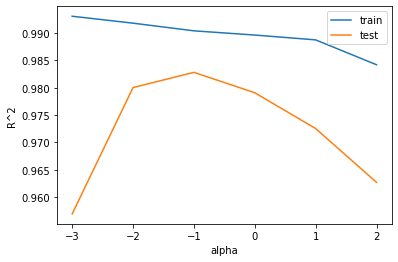

In [20]:
import matplotlib.pyplot as plt

plt.plot(np.log10(alpha_list), train_score, label='train')
plt.plot(np.log10(alpha_list), test_score, label='test')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

train_score과 test_score의 값 사이가 가장 좁았을때 -> 최적의 alpha값

log10(alpha) = -1 대략 최적의 정확도를 확인 할 수 있다. (즉, alpha = 10^-1 = 0.1)

In [21]:
#alpha=0.1 값을 전달한 ridge 모델을 생성하고 훈련한다
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570369
0.9827976465386932


==>훈련세트와 테스트 세트의 점수가 비숫하게 높고 과대적합고 과소적합 사이에
  균형을 맞추고 있다.

### lasso 회귀
라쏘 클래스로 동일한 데이터로 회귀모델을 구현해본다. 라쏘모델도 alpha 매개변수로 규제의 강도를 조절할 수 있다

라쏘도 리지 만큼 좋은 점수를 보여준다.

In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


라쏘도 리지 만큼 좋은 점수를 보여준다. 훈련, 테스트 둘다 높고 비슷한 값이 확인된다.

#### alpha값
라쏘모델도 alpha 매개변수로 규제의 강도를 조절할 수 있다.

In [27]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha_list:
    #Lasso 모델 생성
    lasso = Lasso(alpha=a, max_iter=1000)
    #Lasso 모델 훈련
    lasso.fit(train_scaled, train_target)
    #훈련 정확도 점수 & 테스트 정확도 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

ConvergenceWarning 경고 메세지는 반복횟수가 부족할 때 나오지만 큰 영향을 끼지 않으므로 경고만 보여지지 않게 코드하나만 추가한다.

In [28]:
import warnings
warnings.filterwarnings(action='ignore')

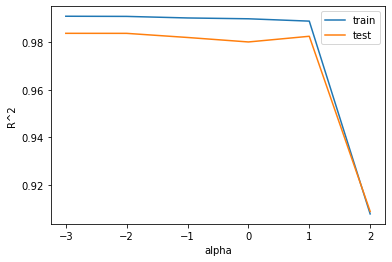

In [29]:
plt.plot(np.log10(alpha_list), train_score, label='train')
plt.plot(np.log10(alpha_list), test_score, label='test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

train_score과 test_score의 값 사이가 가장 좁았을때 -> 최적의 alpha값

log10(alpha) = 1 대략 최적의 정확도를 확인 할 수 있다. (즉, alpha = 10^1 = 10)

In [30]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


==> score를 확인해 보면, 과대적합을 잘 억제하고 테스트 세트의 성능도 높였다.

### 과대 적합을 방지하는 다른 방법

- 라쏘 모델은 계수 값을 아예0으로 만들 수 있다. (라쏘 모델의 계수는 coef_속성에 저장되어있다.)
- lasso.coef_ == 0 조건이 true인 경우만 다 더하면(sum함수 사용), 40개의 특성만 사용한다는 것을 확인할 수 있다.

In [31]:
print(np.sum(lasso.coef_ == 0))
#np.sum()은 True 1, False 0 으로 인식하여 더한다

40


특성의 갯수를 조절해서 모델을 구현하는 방법으로 과대적합을 억제할 수 있다.